# Project 2 

### Katimertzis Charalampos - Michail sdi1600062

### Kolias Gewrgios sdi1600070

In [7]:
import pandas as pd
import numpy as np
import os
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import nltk
nltk.download('stopwords')

data_folder = r'./data'
tfiles = glob.glob(data_folder + "/*")

count=-1

x = []
y = []
z = []
k = []

for i in tfiles:
    path = os.path.normpath(i)
    path = path.split(os.sep)
    cat = path[len(path)-1]
    files = os.listdir(i)
    for text_file in files:
        count=count+1
        file_path = i + "/" +text_file
        with open(file_path, 'r', encoding='utf-8',errors='ignore') as f:
            data = f.readlines()[0:1]
            data = ' '.join(data)
        with open(file_path, 'r', encoding='utf-8',errors='ignore') as f:
            data2 = f.readlines()[1:]
            data2 = ' '.join(data2)
            
            x.append(count)
            y.append(data)
            z.append(data2)
            k.append(cat)

data = {'id':x, 'title': y,'Content':z, 'category': k}       
df = pd.DataFrame(data)

le = preprocessing.LabelEncoder()
le.fit(df['category'])
df['category'] = le.transform(df['category'])

df.to_csv('set.tsv',sep='\t',index=False)
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,title,Content,category
0,0,Ad sales boost Time Warner profit\n,\n Quarterly profits at US media giant TimeWar...,0
1,1,Dollar gains on Greenspan speech\n,\n The dollar has hit its highest level agains...,0
2,2,Yukos unit buyer faces loan claim\n,\n The owners of embattled Russian oil giant Y...,0
3,3,High fuel prices hit BA's profits\n,\n British Airways has blamed high fuel prices...,0
4,4,Pernod takeover talk lifts Domecq\n,\n Shares in UK drinks and food firm Allied Do...,0
...,...,...,...,...
2220,2220,BT program to beat dialler scams\n,\n BT is introducing two initiatives to help b...,4
2221,2221,Spam e-mails tempt net shoppers\n,\n Computer users across the world continue to...,4
2222,2222,Be careful how you code\n,\n A new European directive could put software...,4
2223,2223,US cyber security chief resigns\n,\n The man making sure US computer networks ar...,4


## Word Clouds

In [8]:
from nltk.corpus import webtext 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 
from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt

  
stopWordsSet = set(stopwords.words('english'))
  
biagram_finder = BigramCollocationFinder.from_words(word_tokenize(str(df['Content']))) 

stops = lambda x: len(x) < 3 or x in stopWordsSet 
biagram_finder.apply_word_filter(stops) 

biagram_finder.nbest(BigramAssocMeasures.likelihood_ratio, 100)

[('British', 'Airways'),
 ('Computer', 'users'),
 ('European', 'directive'),
 ('Online', 'role'),
 ('Quarterly', 'profits'),
 ('Russian', 'oil'),
 ('blamed', 'high'),
 ('computer', 'networks'),
 ('could', 'put'),
 ('directive', 'could'),
 ('embattled', 'Russian'),
 ('firm', 'Allied'),
 ('food', 'firm'),
 ('fuel', 'prices'),
 ('high', 'fuel'),
 ('highest', 'level'),
 ('introducing', 'two'),
 ('level', 'agains'),
 ('making', 'sure'),
 ('man', 'making'),
 ('new', 'European'),
 ('playing', 'games'),
 ('put', 'software'),
 ('role', 'playing'),
 ('two', 'initiatives'),
 ('users', 'across'),
 ('world', 'continue'),
 ('giant', 'TimeWar'),
 ('media', 'giant'),
 ('oil', 'giant'),
 ('The', 'dollar'),
 ('The', 'man'),
 ('The', 'owners'),
 ('...', '2220'),
 ('...', '2221'),
 ('...', '2222'),
 ('...', '2223'),
 ('...', '2224'),
 ('...', 'Name'),
 ('TimeWar', '...'),
 ('agains', '...'),
 ('prices', '...'),
 ('software', '...'),
 ('time-consumin', '...'),
 ('...', '...')]

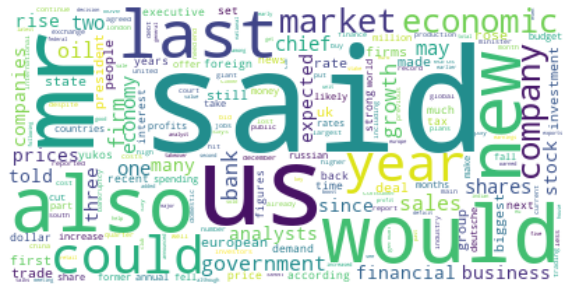

In [9]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

stop_words = set(stopwords.words('english'))

number = df[['Content', 'category']].copy()
number = number[number['Content'].notna()]                   #use only non NaN rows
number['Content'] = number['Content'].str.lower()         #converting every neighbourhood string into lower case

number2 = number.drop_duplicates(subset=['Content'], keep="first") #use only unique ids
number2 = number2.loc[number2['category'] == 0]
#number2 = number2.sort_values(by= ['id'], ascending=True)

number2['Content'] = number2['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word.isalpha()]))
contentSeries = pd.Series(" ".join(number2['Content']).split())

answer = contentSeries.value_counts().sort_values(ascending=False)

wordcloud = WordCloud(background_color="white", collocations = False).generate_from_frequencies(answer)
plt.figure(figsize=[10,12])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

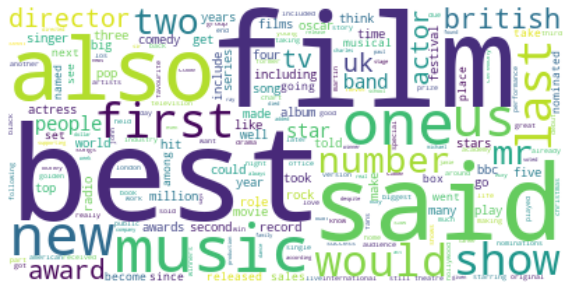

In [10]:
stop_words = set(stopwords.words('english'))

number = df[['Content', 'category']].copy()
number = number[number['Content'].notna()]                   #use only non NaN rows
number['Content'] = number['Content'].str.lower()         #converting every neighbourhood string into lower case

number2 = number.drop_duplicates(subset=['Content'], keep="first") #use only unique ids
number2 = number2.loc[number2['category'] == 1]
#number2 = number2.sort_values(by= ['id'], ascending=True)

number2['Content'] = number2['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word.isalpha()]))
contentSeries = pd.Series(" ".join(number2['Content']).split())

answer = contentSeries.value_counts().sort_values(ascending=False)

wordcloud = WordCloud(background_color="white", collocations = False).generate_from_frequencies(answer)
plt.figure(figsize=[10,12])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

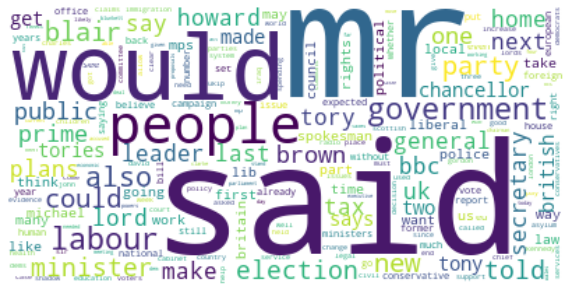

In [11]:
stop_words = set(stopwords.words('english'))

number = df[['Content', 'category']].copy()
number = number[number['Content'].notna()]                   #use only non NaN rows
number['Content'] = number['Content'].str.lower()         #converting every neighbourhood string into lower case

number2 = number.drop_duplicates(subset=['Content'], keep="first") #use only unique ids
number2 = number2.loc[number2['category'] == 2]
#number2 = number2.sort_values(by= ['id'], ascending=True)

number2['Content'] = number2['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word.isalpha()]))
contentSeries = pd.Series(" ".join(number2['Content']).split())

answer = contentSeries.value_counts().sort_values(ascending=False)

wordcloud = WordCloud(background_color="white", collocations = False).generate_from_frequencies(answer)
plt.figure(figsize=[10,12])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

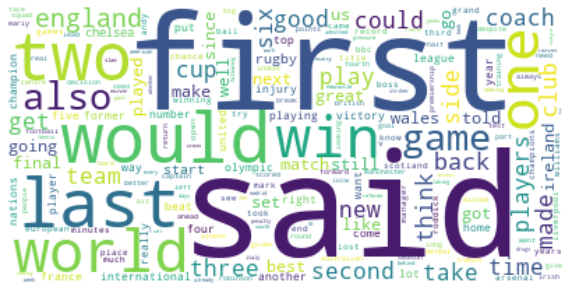

In [12]:
stop_words = set(stopwords.words('english'))

number = df[['Content', 'category']].copy()
number = number[number['Content'].notna()]                   #use only non NaN rows
number['Content'] = number['Content'].str.lower()         #converting every neighbourhood string into lower case

number2 = number.drop_duplicates(subset=['Content'], keep="first") #use only unique ids
number2 = number2.loc[number2['category'] == 3]
#number2 = number2.sort_values(by= ['id'], ascending=True)

number2['Content'] = number2['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word.isalpha()]))
contentSeries = pd.Series(" ".join(number2['Content']).split())

answer = contentSeries.value_counts().sort_values(ascending=False)

wordcloud = WordCloud(background_color="white", collocations = False).generate_from_frequencies(answer)
plt.figure(figsize=[10,12])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

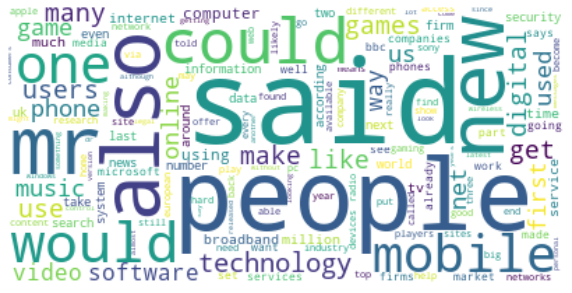

In [13]:
stop_words = set(stopwords.words('english'))

number = df[['Content', 'category']].copy()
number = number[number['Content'].notna()]                   #use only non NaN rows
number['Content'] = number['Content'].str.lower()         #converting every neighbourhood string into lower case

number2 = number.drop_duplicates(subset=['Content'], keep="first") #use only unique ids
number2 = number2.loc[number2['category'] == 4]
#number2 = number2.sort_values(by= ['id'], ascending=True)

number2['Content'] = number2['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words and word.isalpha()]))
contentSeries = pd.Series(" ".join(number2['Content']).split())

answer = contentSeries.value_counts().sort_values(ascending=False)

wordcloud = WordCloud(background_color="white", collocations = False).generate_from_frequencies(answer)
plt.figure(figsize=[10,12])
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## Spliting dataframe into 2 separate dataframes

In [14]:
df['Content'] = df['Content'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in stop_words and word.isalpha() and len(word)>3]))
df_train, df_test, label_train, label_test = train_test_split(df['Content'],  df['category'],  test_size=0.2, stratify=df['category'])

# Classification

### Plot function

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle

def plotfun(labels,predictions):

    fdic = dict() #build dictionaries
    sdic = dict()
    roc_auc = dict()

    for i in range(5):
        fdic[i], sdic[i], _ = roc_curve(np.array(pd.get_dummies(labels))[:, i],  np.array(pd.get_dummies(predictions))[:, i]) #Creating 2 arrays and Calculate Roc curve
        roc_auc[i] = auc(fdic[i], sdic[i]) #Calculate Roc area

    all_fdic = np.unique(np.concatenate([fdic[i] for i in range(5)])) #Join all fdic into all-fdic array and select uniques
    mean_sdic = np.zeros_like(all_fdic)  #Initialize mean_sdic with zeros
    
    for i in range(5):
        mean_sdic = mean_sdic + np.interp(all_fdic, fdic[i], sdic[i])
        
    mean_sdic /= 5 #Find average

    fdic["a"] = all_fdic
    sdic["a"] = mean_sdic
    roc_auc["a"] = auc(fdic["a"], sdic["a"])

    #Plot all Roc curves
    plt.figure(figsize=(13,8))
    
    plt.plot(fdic["a"], sdic["a"], label='mean ROC curve (area = {0:0.2f})' ''.format(roc_auc["a"]), color='deeppink', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'cornflowerblue', 'darkorange'])
    for i, color in zip(range(5), colors):
        plt.plot(fdic[i], sdic[i], color=color, lw=2,
                 label='class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1] ,lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('rate')
    plt.ylabel('rate')
    plt.title('Classes Roc Plots')
    plt.legend(loc="lower right")
    plt.show()

# BAG OF WORDS

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

b_vectorizer = CountVectorizer(stop_words='english', max_features = 1000)
b_dftrain = b_vectorizer.fit_transform(df_train) #creating vectors for train

b_dftest  = b_vectorizer.transform(df_test)

## SVM

In [17]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import  cross_val_score

svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(b_dftrain, label_train) #Give original database and original labels to the model for training

scores = cross_val_score(svc, b_dftrain, label_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(svc, b_dftrain, label_train, cv=10, scoring='precision_weighted' )
print ("precision", np.mean(precisions), precisions)
recalls = cross_val_score(svc, b_dftrain, label_train, cv=10, scoring='recall_weighted')
print ("recall", np.mean(recalls), recalls)
f1s = cross_val_score(svc, b_dftrain, label_train, cv=10, scoring='f1_weighted')
print ("f1-score", np.mean(f1s), f1s)


svm_prediction = svc.predict(b_dftest) #Predict the test labels


f1_score_svm = f1_score(label_test, svm_prediction, average = 'macro')
classification_report_svm = classification_report(label_test, svm_prediction)
print(classification_report_svm)

0.9511235955056181 [0.95505618 0.92696629 0.96067416 0.95505618 0.96067416 0.98314607
 0.9494382  0.92696629 0.93258427 0.96067416]
precision 0.9528572709263671 [0.95735444 0.92843126 0.96243194 0.95859431 0.96100738 0.98380243
 0.95036195 0.92997353 0.93382187 0.9627936 ]
recall 0.9511235955056181 [0.95505618 0.92696629 0.96067416 0.95505618 0.96067416 0.98314607
 0.9494382  0.92696629 0.93258427 0.96067416]
f1-score 0.9508798984924127 [0.95441756 0.92598455 0.96102683 0.95489162 0.96060222 0.98317982
 0.94941015 0.9264934  0.9320306  0.96076225]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       102
           1       0.91      0.96      0.94        77
           2       0.91      0.96      0.94        84
           3       0.98      0.99      0.99       102
           4       0.97      0.91      0.94        80

    accuracy                           0.94       445
   macro avg       0.94      0.94      0.94       445
weighted avg

#### PLOT

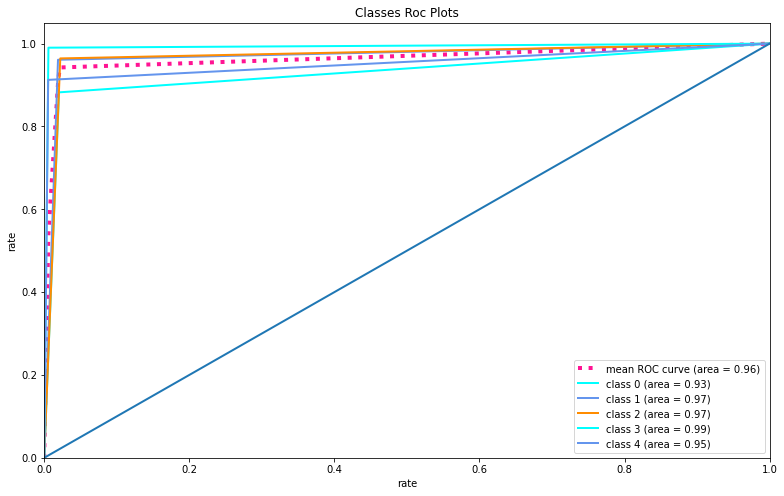

In [18]:
plotfun(label_test,svm_prediction)

## Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier



rfc = RandomForestClassifier(max_depth=4, random_state=0)

rfc.fit(b_dftrain, label_train) #Give original database and original labels to the model for training

scores = cross_val_score(rfc, b_dftrain, label_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(rfc, b_dftrain, label_train, cv=10, scoring='precision_weighted' )
print ("precision", np.mean(precisions), precisions)
recalls = cross_val_score(rfc, b_dftrain, label_train, cv=10, scoring='recall_weighted')
print ("recall", np.mean(recalls), recalls)
f1s = cross_val_score(rfc, b_dftrain, label_train, cv=10, scoring='f1_weighted')
print ("f1-score", np.mean(f1s), f1s)

rfc_prediction = rfc.predict(b_dftest) #Predict the test labels

f1_score_rfc = f1_score(label_test, rfc_prediction, average = 'macro')
classification_report_rfc = classification_report(label_test, rfc_prediction)
print(classification_report_rfc)

0.852247191011236 [0.84831461 0.88764045 0.87078652 0.88202247 0.84269663 0.88764045
 0.82022472 0.83707865 0.81460674 0.83146067]
precision 0.8789707382798222 [0.87015855 0.91019161 0.88153198 0.90403291 0.87780463 0.90512563
 0.85141456 0.86241881 0.85041592 0.87661278]
recall 0.852247191011236 [0.84831461 0.88764045 0.87078652 0.88202247 0.84269663 0.88764045
 0.82022472 0.83707865 0.81460674 0.83146067]
f1-score 0.849960765345061 [0.8452387  0.88735192 0.86691644 0.88116031 0.83450687 0.88812198
 0.82078475 0.83760079 0.81036624 0.82755965]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       102
           1       0.91      0.62      0.74        77
           2       0.95      0.85      0.89        84
           3       0.72      0.98      0.83       102
           4       0.94      0.80      0.86        80

    accuracy                           0.84       445
   macro avg       0.87      0.83      0.84       445
weighted avg   

#### PLOT

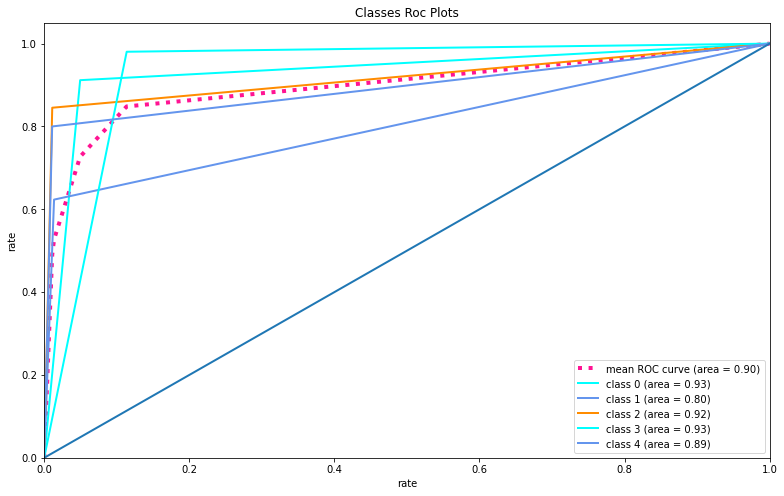

In [20]:
plotfun(label_test,rfc_prediction)

## Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

Mb_dftrain = b_dftrain.toarray()
Mb_dftest = b_dftest.toarray()

gnb.fit(Mb_dftrain, label_train) #Give original database and original labels to the model for training

scores = cross_val_score(gnb, Mb_dftrain, label_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(gnb, Mb_dftrain, label_train, cv=10, scoring='precision_weighted' )
print ("precision", np.mean(precisions), precisions)
recalls = cross_val_score(gnb, Mb_dftrain, label_train, cv=10, scoring='recall_weighted')
print ("recall", np.mean(recalls), recalls)
f1s = cross_val_score(gnb, Mb_dftrain, label_train, cv=10, scoring='f1_weighted')
print ("f1-score", np.mean(f1s), f1s)

gnb_prediction = gnb.predict(Mb_dftest) #Predict the test labels

f1_score_gnb = f1_score(label_test, gnb_prediction, average = 'macro')
classification_report_gnb = classification_report(label_test, gnb_prediction)
print(classification_report_gnb)

0.9129213483146067 [0.94382022 0.90449438 0.89325843 0.93820225 0.8988764  0.91011236
 0.90449438 0.8988764  0.94382022 0.89325843]
precision 0.9170960668764943 [0.94433573 0.90849909 0.89873865 0.94152296 0.90376107 0.91522616
 0.91397852 0.9018379  0.94699254 0.89606806]
recall 0.9129213483146067 [0.94382022 0.90449438 0.89325843 0.93820225 0.8988764  0.91011236
 0.90449438 0.8988764  0.94382022 0.89325843]
f1-score 0.9132580377860474 [0.9432776  0.90507309 0.89436412 0.93864462 0.90021088 0.90933221
 0.90462291 0.89927569 0.94401425 0.89376501]
              precision    recall  f1-score   support

           0       0.88      0.79      0.84       102
           1       0.84      0.83      0.84        77
           2       0.86      0.92      0.89        84
           3       0.96      0.91      0.93       102
           4       0.81      0.91      0.86        80

    accuracy                           0.87       445
   macro avg       0.87      0.87      0.87       445
weighted avg

#### PLOT

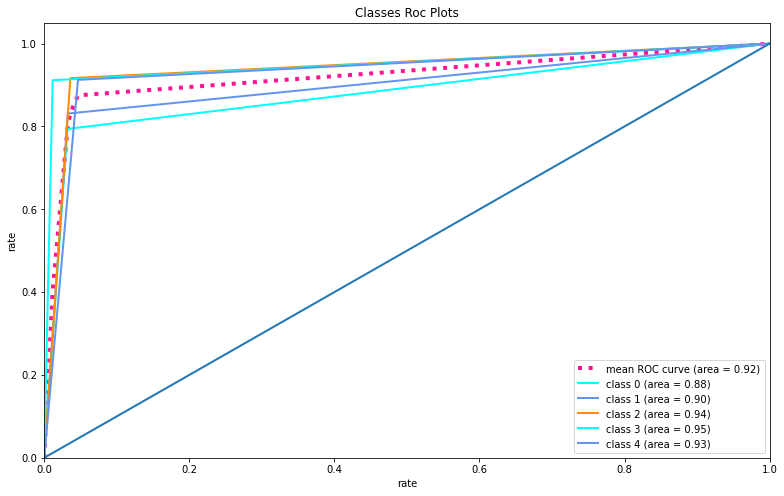

In [22]:
plotfun(label_test,gnb_prediction)

## KNN

### Class

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics.pairwise import cosine_similarity
class knn(BaseEstimator, ClassifierMixin):
    
    def __init__(self, k = 4):
        self.k = k
        
    def fit(self, train_set, label_train):
        self.train_set = train_set
        self.label_train = label_train
        
    def predict(self, test_set):
        cosinedf = pd.DataFrame(cosine_similarity(self.train_set[0:], test_set[0:]), index=self.label_train['id'][0:])
        predictions = []
        for y in range(len(cosinedf.columns)):   
            tempdf = cosinedf[y]
            tempdf = tempdf.sort_values(ascending=False)
            tempCategList = []
            tempdf= tempdf.head(self.k)
            for item in tempdf.index:
                tempCategList.append(int((self.label_train).loc[self.label_train['id'] == item]['category']))
            vote = max(set(tempCategList), key=tempCategList.count)
            predictions.append(vote)
        
        return predictions

In [24]:
label_train_df = pd.DataFrame(label_train)
label_train_df.insert(0, 'id', range(0, len(label_train_df)))

knnClassifier = knn(5)    

knnClassifier.fit(b_dftrain, label_train_df)

result = knnClassifier.predict(b_dftest)
f1_score_knn = f1_score(label_test, result, average = 'macro')
classification_report_knn = classification_report(label_test, result)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       102
           1       0.96      0.88      0.92        77
           2       0.82      0.92      0.87        84
           3       0.99      0.97      0.98       102
           4       0.92      0.88      0.90        80

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445



#### PLOT

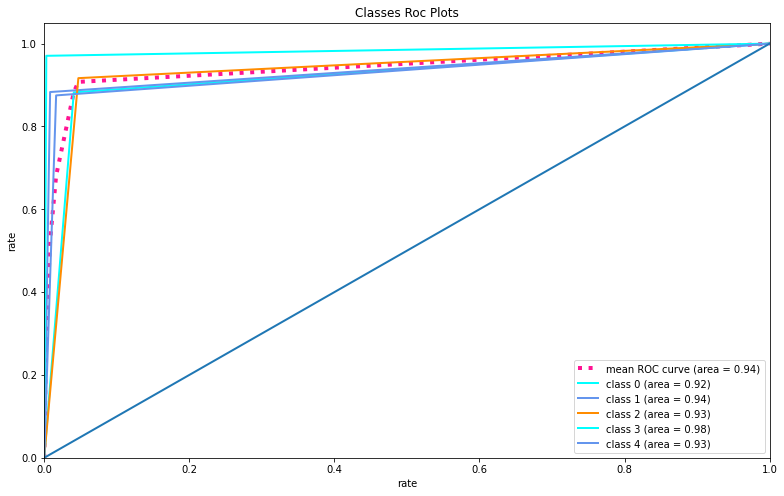

In [25]:
plotfun(label_test, result)

# TF - IDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_dftrain = tfidf_vectorizer.fit_transform(df_train)         # build the vectors for the training dataset

tfidf_dftest = tfidf_vectorizer.transform(df_test) # build the vectors for the training dataset

#print(tfidf_dftrain)

## SVM

In [27]:
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(tfidf_dftrain, label_train) #Give original database and original labels to the model for training

scores = cross_val_score(svc, tfidf_dftrain, label_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(svc, tfidf_dftrain, label_train, cv=10, scoring='precision_weighted' )
print ("precision", np.mean(precisions), precisions)
recalls = cross_val_score(svc, tfidf_dftrain, label_train, cv=10, scoring='recall_weighted')
print ("recall", np.mean(recalls), recalls)
f1s = cross_val_score(svc, tfidf_dftrain, label_train, cv=10, scoring='f1_weighted')
print ("f1-score", np.mean(f1s), f1s)

svm_prediction = svc.predict(tfidf_dftest) #Predict the test labels

f1_score_svm = f1_score(label_test, svm_prediction, average = 'macro')
classification_report_svm = classification_report(label_test, svm_prediction)
print(classification_report_svm)

0.9617977528089888 [0.95505618 0.9494382  0.96629213 0.97191011 0.96067416 0.97752809
 0.96067416 0.9494382  0.95505618 0.97191011]
precision 0.9625864077752055 [0.95526513 0.94958613 0.96730833 0.97287198 0.96158617 0.97792937
 0.96182338 0.94995014 0.95683076 0.97271268]
recall 0.9617977528089888 [0.95505618 0.9494382  0.96629213 0.97191011 0.96067416 0.97752809
 0.96067416 0.9494382  0.95505618 0.97191011]
f1-score 0.9617922293806392 [0.95460074 0.94919051 0.96648724 0.97188816 0.96088389 0.9774762
 0.96069995 0.9494695  0.95512122 0.97210489]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       102
           1       0.95      0.97      0.96        77
           2       0.91      0.98      0.94        84
           3       0.99      0.98      0.99       102
           4       0.97      0.91      0.94        80

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg 

#### PLOT

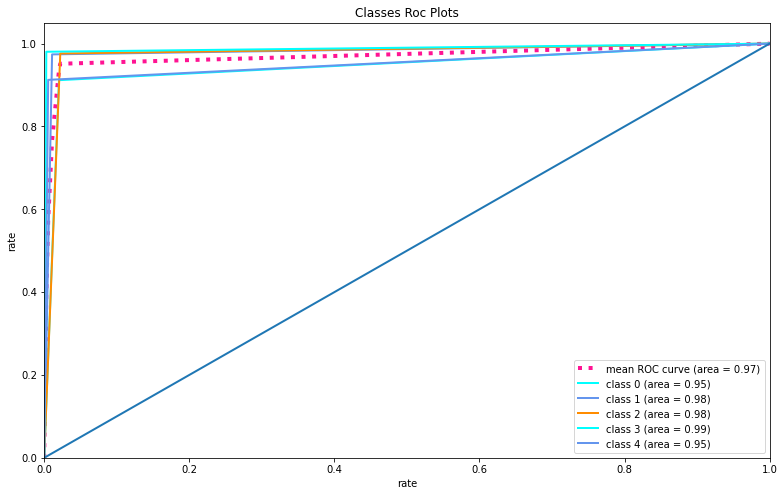

In [28]:
plotfun(label_test,svm_prediction)


## Random Forests

In [29]:
rfc = RandomForestClassifier(max_depth=4, random_state=0)

rfc.fit(tfidf_dftrain, label_train) #Give original database and original labels to the model for training

scores = cross_val_score(rfc, tfidf_dftrain, label_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(rfc, tfidf_dftrain, label_train, cv=10, scoring='precision_weighted' )
print ("precision", np.mean(precisions), precisions)
recalls = cross_val_score(rfc, tfidf_dftrain, label_train, cv=10, scoring='recall_weighted')
print ("recall", np.mean(recalls), recalls)
f1s = cross_val_score(rfc, tfidf_dftrain, label_train, cv=10, scoring='f1_weighted')
print ("f1-score", np.mean(f1s), f1s)

rfc_prediction = rfc.predict(tfidf_dftest) #Predict the test labels

f1_score_rfc = f1_score(label_test, rfc_prediction, average = 'macro')
classification_report_rfc = classification_report(label_test, rfc_prediction)
print(classification_report_rfc)

0.8561797752808988 [0.82022472 0.88764045 0.85955056 0.8988764  0.85393258 0.90449438
 0.81460674 0.85393258 0.84269663 0.8258427 ]
precision 0.882333545723921 [0.87017008 0.90504226 0.87933286 0.91780424 0.88405895 0.9113418
 0.83409341 0.8755439  0.86981529 0.87613266]
recall 0.8561797752808988 [0.82022472 0.88764045 0.85955056 0.8988764  0.85393258 0.90449438
 0.81460674 0.85393258 0.84269663 0.8258427 ]
f1-score 0.8532874445703211 [0.81965047 0.88712718 0.85540053 0.89775734 0.84459247 0.90277962
 0.80632515 0.85410339 0.84168815 0.82345014]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87       102
           1       0.95      0.55      0.69        77
           2       0.92      0.93      0.92        84
           3       0.75      0.95      0.84       102
           4       0.95      0.88      0.91        80

    accuracy                           0.85       445
   macro avg       0.88      0.84      0.85       445
weighted avg  

#### PLOT

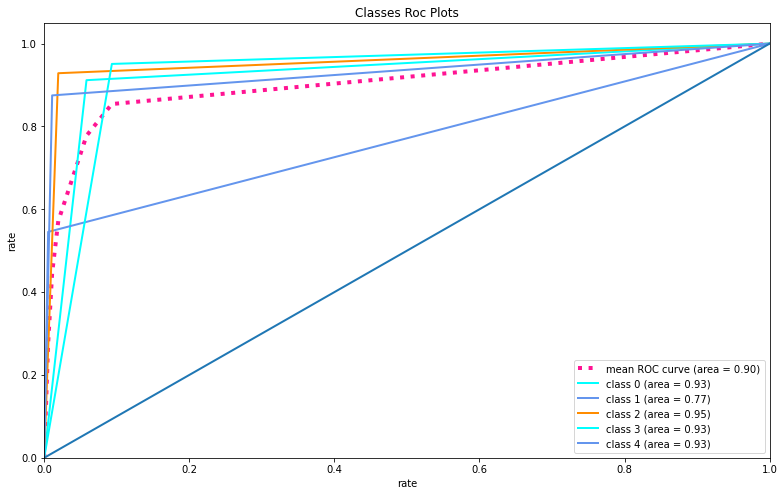

In [30]:
plotfun(label_test,rfc_prediction)

## Naive Bayes

In [31]:
gnb = GaussianNB()

Mtfidf_dftrain = tfidf_dftrain.toarray()
Mtfidf_dftest = tfidf_dftest.toarray()

gnb.fit(Mtfidf_dftrain, label_train) #Give original database and original labels to the model for training

scores = cross_val_score(gnb, Mtfidf_dftrain, label_train, cv=10)
print (np.mean(scores), scores)
precisions = cross_val_score(gnb, Mtfidf_dftrain, label_train, cv=10, scoring='precision_weighted' )
print ("precision", np.mean(precisions), precisions)
recalls = cross_val_score(gnb, Mtfidf_dftrain, label_train, cv=10, scoring='recall_weighted')
print ("recall", np.mean(recalls), recalls)
f1s = cross_val_score(gnb, Mtfidf_dftrain, label_train, cv=10, scoring='f1_weighted')
print ("f1-score", np.mean(f1s), f1s)

gnb_prediction = gnb.predict(Mtfidf_dftest) #Predict the test labels

f1_score_gnb = f1_score(label_test, gnb_prediction, average = 'macro')
classification_report_gnb = classification_report(label_test, gnb_prediction)
print(classification_report_gnb)

0.8988764044943819 [0.93820225 0.88764045 0.87640449 0.92134831 0.87640449 0.88764045
 0.90449438 0.89325843 0.91573034 0.88764045]
precision 0.9040913793306746 [0.93883063 0.88955755 0.88760365 0.92517837 0.88330322 0.89594257
 0.91316295 0.8958243  0.91945887 0.89205169]
recall 0.8988764044943819 [0.93820225 0.88764045 0.87640449 0.92134831 0.87640449 0.88764045
 0.90449438 0.89325843 0.91573034 0.88764045]
f1-score 0.8996046589064545 [0.93782063 0.88736382 0.87888826 0.92222231 0.87829267 0.88776662
 0.9057615  0.89350263 0.91597838 0.88844977]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       102
           1       0.81      0.88      0.84        77
           2       0.85      0.88      0.87        84
           3       0.98      0.88      0.93       102
           4       0.80      0.91      0.85        80

    accuracy                           0.86       445
   macro avg       0.86      0.87      0.86       445
weighted avg

#### PLOT

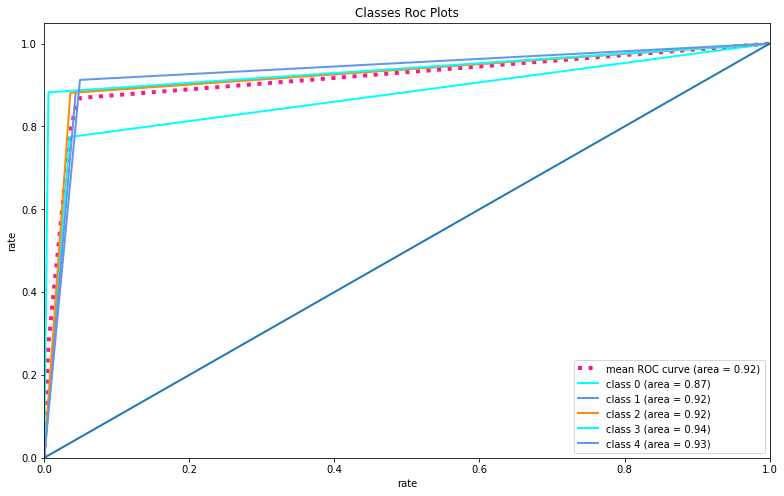

In [32]:
plotfun(label_test,gnb_prediction)

## KNN

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pickle

knnClassifier = knn(5)    
knnClassifier.fit(tfidf_dftrain, label_train_df)

result = knnClassifier.predict(tfidf_dftest)

f1_score_knn = f1_score(label_test, result, average = 'macro')
classification_report_knn = classification_report(label_test, result)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       102
           1       0.91      0.92      0.92        77
           2       0.88      0.90      0.89        84
           3       0.97      0.96      0.97       102
           4       0.95      0.90      0.92        80

    accuracy                           0.91       445
   macro avg       0.92      0.91      0.91       445
weighted avg       0.92      0.91      0.91       445



#### PLOT

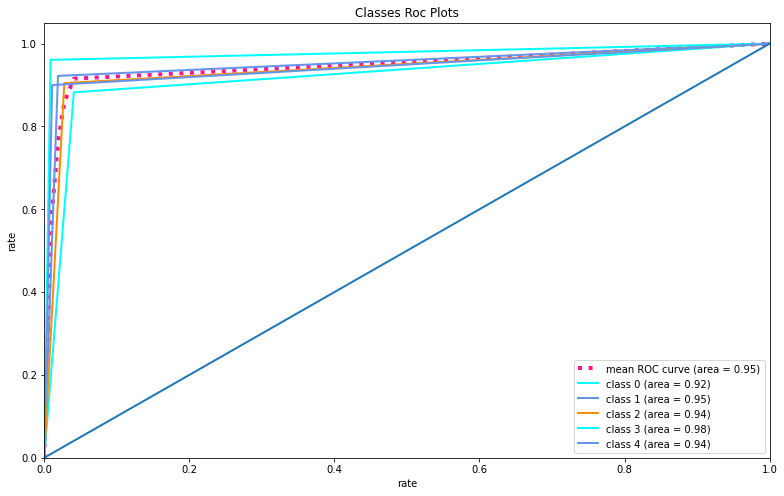

In [34]:
plotfun(label_test,result)

# Clustering

### Plot Function

In [35]:
import seaborn as sns

def plotfun2(data, clusters):
    data = pd.DataFrame(data)
    data['labels'] = clusters
    data.columns = ['x','y','labels']
    sns.lmplot(data=data, x='x', y='y', hue='labels', 
                       fit_reg=False, legend=True, legend_out=True)

## Tfidf

In [36]:
clu_tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=13000, stop_words='english')
clu_tfidf_dftrain = clu_tfidf_vectorizer.fit_transform(df_train)

similarities = cosine_similarity(clu_tfidf_dftrain)
print(clu_tfidf_dftrain.shape)

(1780, 12271)


In [37]:
from sklearn.cluster import KMeans

kmeansclassifier = KMeans(n_clusters = 5)
kmeansclassifier = kmeansclassifier.fit(clu_tfidf_dftrain)

clu = kmeansclassifier.labels_.tolist()

### PCA

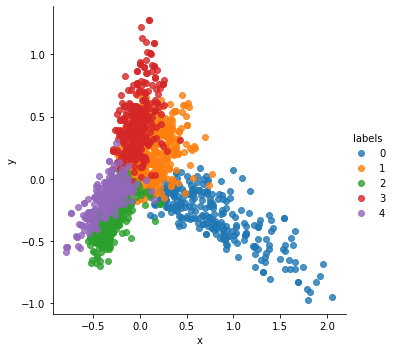

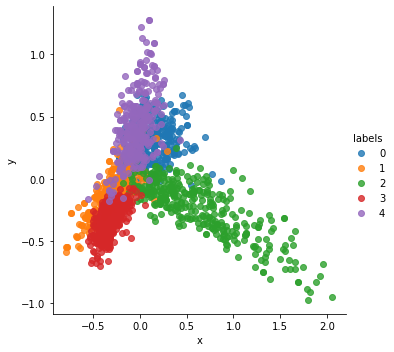

In [38]:
from sklearn.decomposition import PCA

Pca = PCA(n_components=2)
xy = Pca.fit_transform(1-similarities)

plotfun2(xy, clu)
plotfun2(xy, label_train.tolist())

### SVD

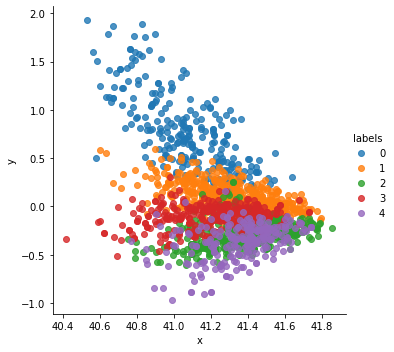

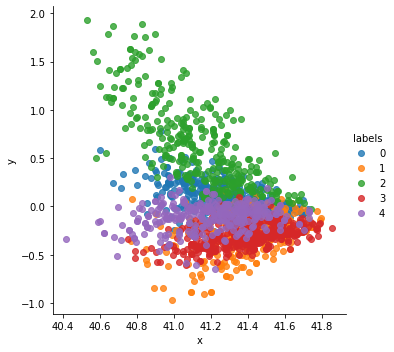

In [39]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
xy = svd.fit_transform(1-similarities)

plotfun2(xy, clu)
plotfun2(xy, label_train.tolist())

### ICA

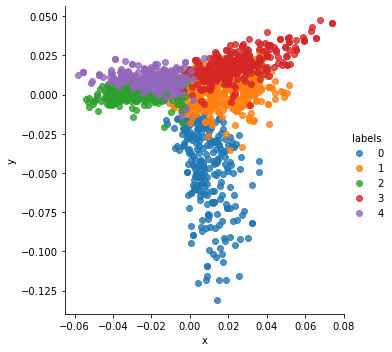

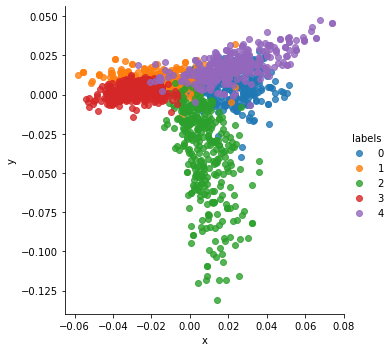

In [40]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2, random_state=42)
xy = ica.fit_transform(1-similarities)

plotfun2(xy, clu)
plotfun2(xy, label_train.tolist())

## Word2Vec

In [41]:
import nltk
nltk.download('punkt')

df_train2 = pd.DataFrame(df_train)
articleList = []
df_train2['Content'].apply(lambda x: articleList.append([word for word in word_tokenize(x) if word not in stop_words and word.isalpha()]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Charis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


96      None
504     None
1399    None
2068    None
706     None
        ... 
1010    None
677     None
291     None
1080    None
1993    None
Name: Content, Length: 1780, dtype: object

In [42]:
from gensim.models import Word2Vec
vocabulary = Word2Vec(articleList)

In [43]:
from sklearn import cluster
from sklearn import metrics

articleVectors = []
for article in articleList:
    
    wordCounter = 0
    vector = []
    for word in article:
        if word in vocabulary:
            if wordCounter == 0:            
                vector = vocabulary[word]
            else:
                vector = np.add(vector,vocabulary[word])
            wordCounter = wordCounter + 1  
    vector = np.asarray(vector)/wordCounter
    
    articleVectors.append(vector)

train = np.array(articleVectors)
similarities = cosine_similarity(train)

<ipython-input-43-0992020f534f>:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if word in vocabulary:
<ipython-input-43-0992020f534f>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = vocabulary[word]
<ipython-input-43-0992020f534f>:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = np.add(vector,vocabulary[word])


In [44]:
kmeans = cluster.KMeans(n_clusters=5)
kmeans = kmeans.fit(train)
clu = kmeans.labels_.tolist()

### PCA

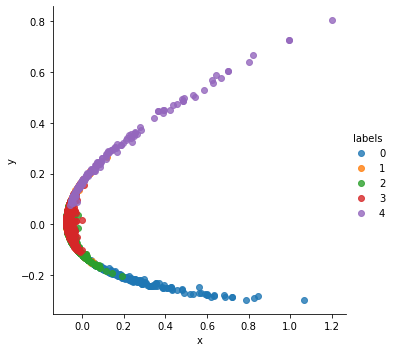

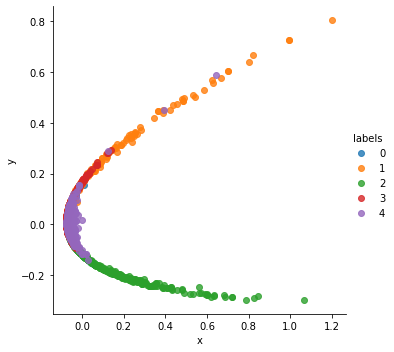

In [45]:
Pca = PCA(n_components=2)
xy = Pca.fit_transform(1 - similarities)

plotfun2(xy, clu)
plotfun2(xy, label_train.tolist())

### SVD

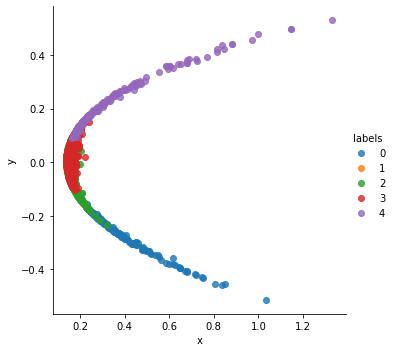

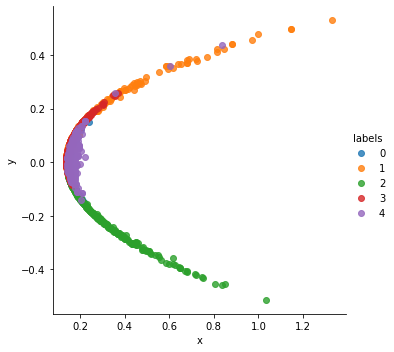

In [46]:
svd = TruncatedSVD(n_components=2)
xy = svd.fit_transform(1-similarities)

plotfun2(xy, clu)
plotfun2(xy, label_train.tolist())

### ICA

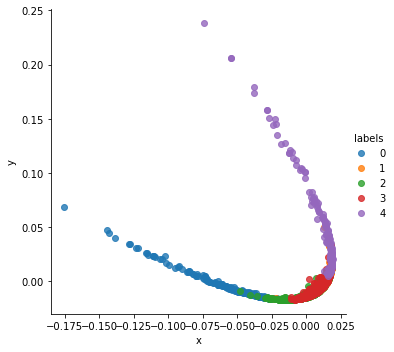

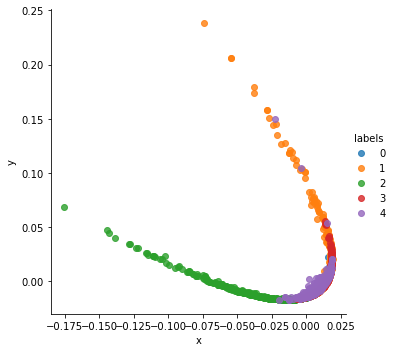

In [47]:
ica = FastICA(n_components=2)
xy = ica.fit_transform(1-similarities)

plotfun2(xy, clu)
plotfun2(xy, label_train.tolist())